In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from yellowbrick.regressor import ResidualsPlot, PredictionError


pd.options.display.float_format = '{:,.3f}'.format

%matplotlib inline

In [12]:
data = pd.read_csv('winequality_clean.csv')

# Criando Variável dummy para indicar o tipo de vinho
data['cal_tinto'] = data.eval('type == "Red"') * 1

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
target = 'quality'
features = ['fixed acidity',        'volatile acidity', 'citric acid',
            'residual sugar',       'chlorides',        'free sulfur dioxide',
            'total sulfur dioxide', 'density',          'pH', 
            'sulphates',            'alcohol',          'cal_tinto']

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

### Modelagem

Como verificamos na parte de exploração de dados, não temos todos os scores de 0 a 10 e portanto não é possível utilizar um modelo de classificação para resolver o problema.

Utilizaremos portanto técnicas de regressão, como regressão linear, Ridge e Árvores de regressão

### Regressão Linear Múltipla

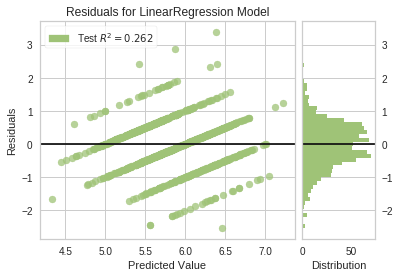

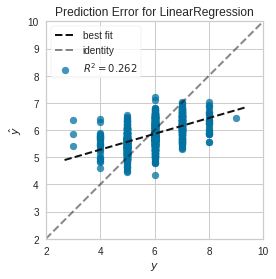

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

vis = ResidualsPlot(lr)

vis.score(X_test, y_test)
vis.poof()

vis = PredictionError(lr)

vis.score(X_test, y_test)
vis.poof() 

### Regressão de Ridge

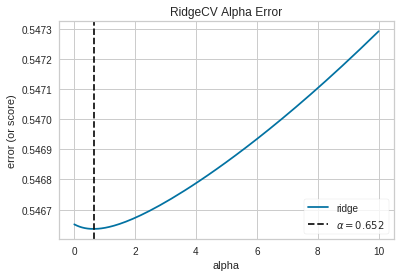

In [41]:
from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 400)


ridge = RidgeCV(alphas=alphas, store_cv_values=True)

vis = AlphaSelection(ridge)

vis.fit(X_train, y_train)
g = vis.poof()

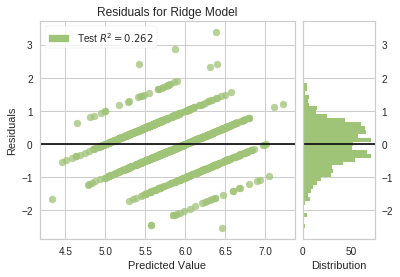

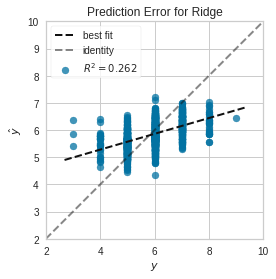

In [46]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = .65)
ridge.fit(X_train, y_train)

vis = ResidualsPlot(ridge)

vis.score(X_test, y_test)
vis.poof()

vis = PredictionError(ridge)

vis.score(X_test, y_test)
vis.poof() 

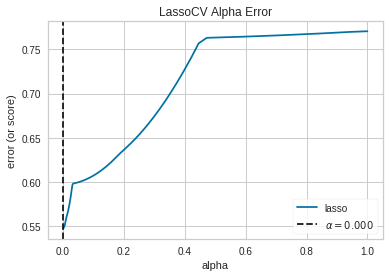

In [45]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-10, 0, 400)


lasso = LassoCV(alphas=alphas, cv=5)

vis = AlphaSelection(lasso)

vis.fit(X_train, y_train)
g = vis.poof()

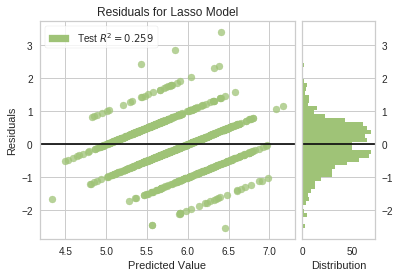

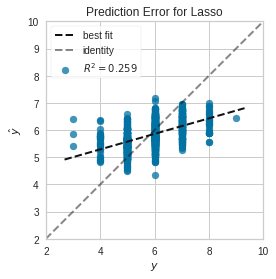

In [54]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

vis = ResidualsPlot(lasso)

vis.score(X_test, y_test)
vis.poof()

vis = PredictionError(lasso)

vis.score(X_test, y_test)
vis.poof()

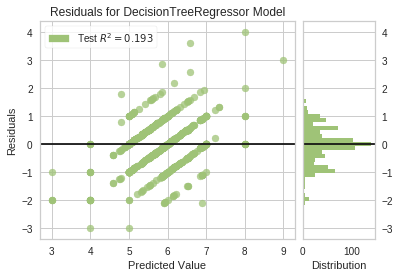

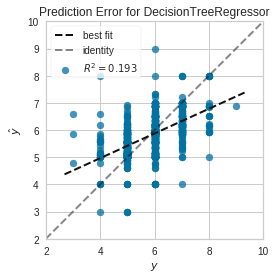

In [68]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10)


dt.fit(X_train, y_train)

vis = ResidualsPlot(dt)

vis.score(X_test, y_test)
vis.poof()

vis = PredictionError(dt)

vis.score(X_test, y_test)
vis.poof()

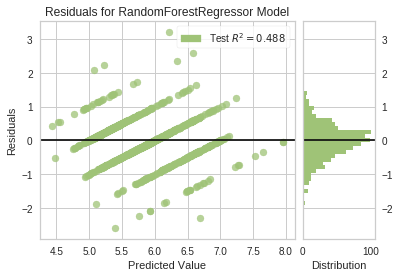

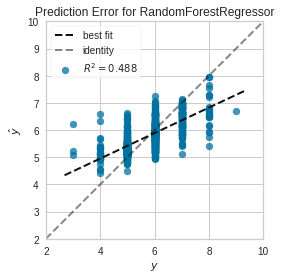

In [66]:
from sklearn.ensemble import RandomForestRegressor

dt = RandomForestRegressor(max_depth=15, n_estimators=100)


dt.fit(X_train, y_train)

vis = ResidualsPlot(dt)

vis.score(X_test, y_test)
vis.poof()

vis = PredictionError(dt)

vis.score(X_test, y_test)
vis.poof()

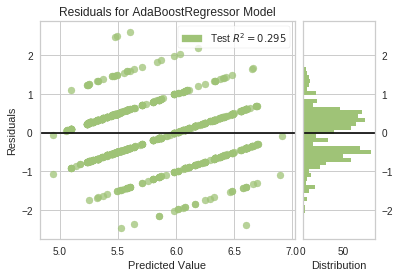

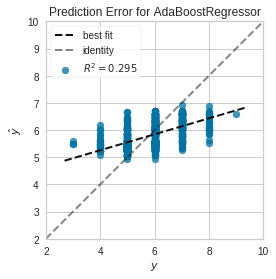

In [74]:
from sklearn.ensemble import AdaBoostRegressor

dt = AdaBoostRegressor(n_estimators=100)


dt.fit(X_train, y_train)

vis = ResidualsPlot(dt)

vis.score(X_test, y_test)
vis.poof()

vis = PredictionError(dt)

vis.score(X_test, y_test)
vis.poof()

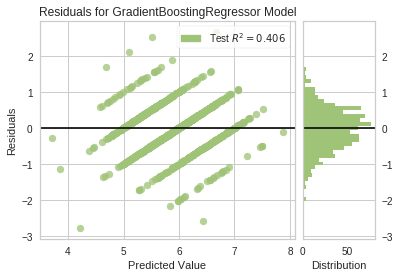

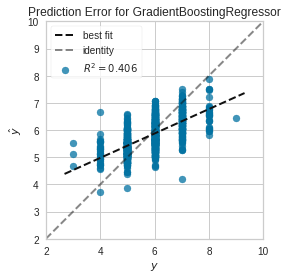

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

dt = GradientBoostingRegressor(n_estimators=100 , learning_rate=0.3, max_depth=10, max_leaf_nodes=10, loss='ls')


dt.fit(X_train, y_train)

vis = ResidualsPlot(dt)

vis.score(X_test, y_test)
vis.poof()

vis = PredictionError(dt)

vis.score(X_test, y_test)
vis.poof()